# Lesson 12: Error Handling, Exceptions
***
## Introduction
***
Exceptions are the events that are triggered when the program encounters an error during execution. When an error occurs, we can handle these exceptions to avoid the program from getting crashed.

## Why do we Require Exception Handling?
- Error Handling: In the case of Errors during runtime, the application might terminate unconditionally. Using the Exception Handling, we can handle the scenario of Failures and avoid termination of the program.
- Code Separation: Error Handling can help us segregate the code that is required for error handling from the main logic. The error related code can be placed inside the “except” block which is segregating it from the regular code that contains the application logic.
- Grouping Error Type and Error Differentiation: It can help us to segregate different kinds of errors that are encountered during the execution. We can have multiple “except” blocks, each handling a specific kind of error. In the article below, we will see the implementation of multiple “except” blocks to handle different types of error.
It’s important we make a clear distinction between what an error is in Python, as there are two. One error is known as a syntax error (or parsing error). This is when our program is being parsed and detects an incorrect statement within our code. These types of errors cannot be handled.

In [ ]:
print(Hello World)

# SyntaxError: invalid syntax

Another type of error we may observe is an Exception error. These types of errors occur when our code is syntactically correct but an unexpected event occurred during the execution of the program. They are not unconditionally fatal and can be handled at runtime.

# Catching and handling Exceptions
***
To capture the exceptions we use a code block called try-except. We put the piece of code that is suspected to be a source of error inside a try block then capture and design the response inside the except block.
A simple boilerplate code example would be:

In [ ]:
def my_func() -> Any:
    try:
    # code which might throw/raise exception
    except <exception_to_handle>:
    # code to be executed once the exception is handled.

my_func()

The basic schema for exception handling is here down below
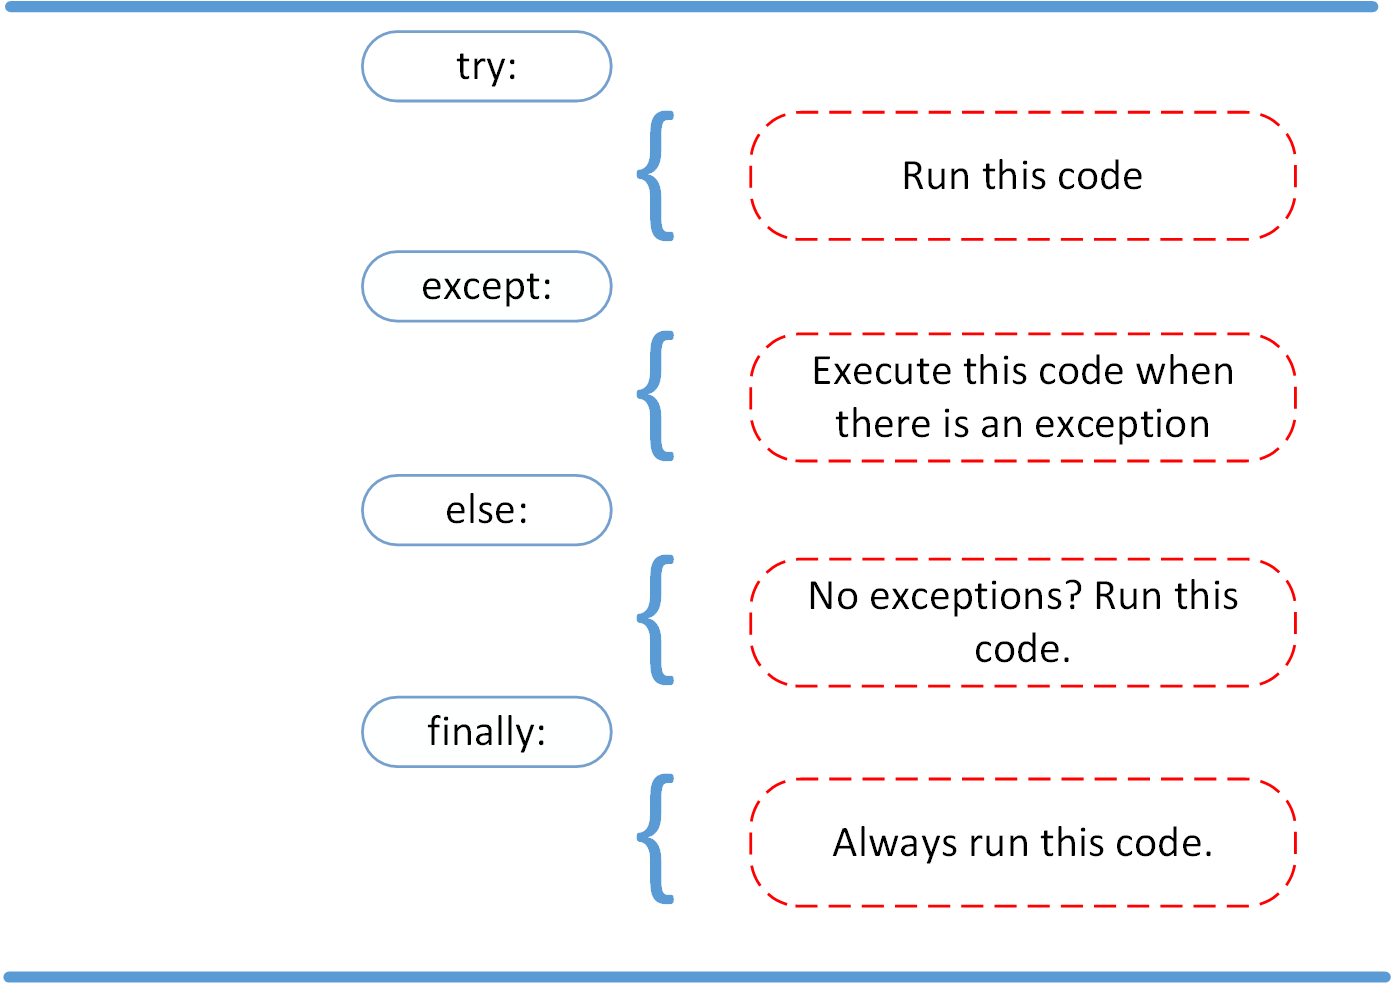

Python consists of several built-in exceptions we may leverage in our programs:

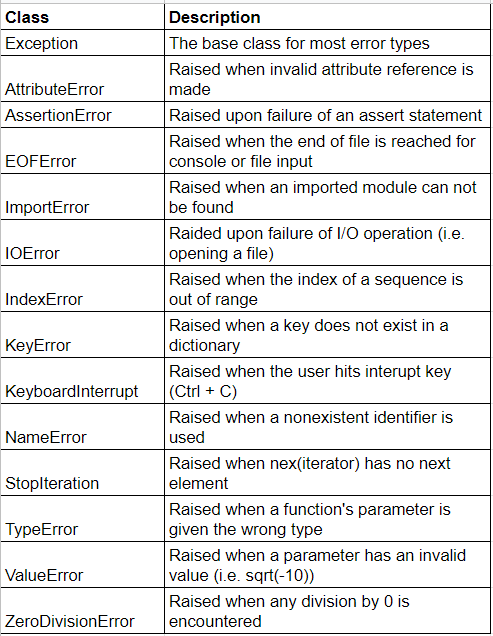

Lets use simple function to divide 2 numbers and try to handle possible error:

In [1]:
def divide_two_numbers(dividend: int, divisor: int) -> None:
    try:
        quotient = dividend / divisor
        print(f'Result = {quotient}')
    except ZeroDivisionError:
        print('Divisor is zero; Division is impossible')

Multiple except clauses:

It is possible that your code may raise more than just one type of exception. It may be ValueError, AttributeError, KeyError etc. These are some of the built-in exceptions we already mentioned above. Lets take example of the simple statement:



In [ ]:
int_value = int(a)

This statement may raise ValueError or TypeError or may not raise any exceptions at all depending upon the type and value of variable a. Suppose a = 3.2 or a = '1200' then no exception; if a = '12k' then ValueError and if a = [1, 2] then TypeError is raised.

Here is how we handle both of them:

In [ ]:
def my_dummy_int_func(a: Union[string, float]) -> None:
    try:
        int_value = int(a)
    except ValueError:
        print('Value of "a" cannot be deduced to integer')
    except TypeError:
        print('Type of "a" is incompatible; should either be a number or a string')

Multiple exceptions in a single except clause:
Boilerplate code :

In [ ]:
try:
    # exception prone code here	
except (exception_1, exception_2, .... ,exception_n):
    # code to be executed once the exception is handled

And the same example as above:

In [ ]:
def my_dummy_int_func(a: Union[string, float]) -> None:
    try:
        int_value = int(a)
    except (ValueError, TypeError):
        print('Error occurred. Either "a" is not an integer or type of "a" is incompatible')

Aliasing:
Notice the following line in the code below:

In [ ]:
except (exception_1, exception_2, ..) as e:

That is the exception(s) is(are) being given a name. Technically, it is called aliasing. With aliasing, we can access the exception(s) with a common name. This is useful if you want to use attributes of the exception being handled. Aliasing is done through as keyword (boilerplate code):

In [ ]:
try:
    # try code
except (exception_1, exception_2, ..) as <alias>:
    # exception handling here
    # you can access attributes of exception(s) being handled through it’s alias < alias >;

Where < alias > should be replaced with an alias name.

Example:

In [ ]:
try:
    raise NameError('Undefined name')
    # raise ValueError('Invalid name')
except (NameError, ValueError) as err:
    print(f'Got exception with msg {err.args}')

Output:
('Invalid name')

- Python provides a way to raise an exception manually. It’s through raise keyword. raise keyword takes only one argument that is either an exception class (that derives from Exception class) or an exception instance. In the below example the argument is an exception instance with a string message. This string message (optional) when sent should describe the error.

In [ ]:

>>> raise AssertionError('Asserted statement is incorrect')
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
    raise AssertionError('Asserted statement is incorrect')
AssertionError: Asserted statement is incorrect

 ATTENTION  If your aliasing a single exception then surrounding parentheses are optional. Parentheses are mandatory if your aliasing multiple exceptions as in the above example. arrow_double_up

The simplistic boilerplate code for alias is:

In [ ]:
def dummy_func() -> None:
    try:
        # dummy full of errors code 😒 
    except Exceptions as e:
        print(f'Heh, I cought another one...{e}')

 **PRO TIP** Try to avoid generic except clause, otherwise you can miss and/or mishandle potential errors arrow_down_small

In [ ]:

def my_func() -> Any:
    try:
    # code which might throw/raise exception
    except:
        print('Ups! Something went wrong!')

my_func()

Else clause:
else clause is optional and if it is present, it should always follow except clause. Code under else clause is executed only when code under try clause raises no exception. If an exception occurs in the try block then else block won’t be executed though the except clause handles it:

In [ ]:
def divide(a: Union[int, float], b: Union[int, float]) -> Optional[float]:
    try:
        return a / b
    except ZeroDivisionError:
        print('Cannot divide by zero')
    else:
        print(f'Output = {output}'))

In [ ]:
>>> divide(20, 10)
Output = 2.0>>> divide(20, 0)
Cannot divide by zero

Finally clause:
The try statement has one last clause finally, which is basically used for clean up actions. When used, it should follow all other clauses. finally clause is executed in any event irrespective of whether an exception has occurred or not. finally clause does not strictly need the else or except clause to be present:

In [ ]:
from typing import Optional, Union 

def divide(a: Union[int, float], b: Union[int, float]) -> Optional[float]:
    try:
        output = a / b
    except ZeroDivisionError:
	    print('Cannot divide by zero')
    else:
        print(f'Output = {output}')
    finally:
        print('Executing finally clause')

In [ ]:
>>> divide(2, 1)
Output = 2.0
Executing finally clause>>> divide(2, 0)
Cannot divide by zero
Executing finally clause>>> divide("2", "1")
Executing finally clause
Traceback (most recent call last):
 File "<stdin>", line 1, in <module>
 File "<stdin>", line 3, in divide
TypeError: unsupported operand type(s) for /: 'str' and 'str'

A `finally` clause is always executed before leaving the try statement, whether an exception has occurred or not. When an exception has occurred in the try clause and has not been handled by an except clause (or it has occurred in an except or else clause), it is re-raised (see the third call to divide function above) after the finally clause has been executed. The finally clause is also executed “on the way out” when any other clause of the try statement is left via a `break`, `continue` or `return` statement.

